# Initial Clarifications about the Project:

This project focuses on the analysis and evaluation of Machine Learning and Data Analytics tools to determine the optimal models in predicting the profitability of stocks. 

It is essential to highlight:

The project does not aim to provide incentives or advice on stock investments.
Any investment, including ETFs, comes with risks. Before investing in an ETF, it's crucial to fully research and understand its characteristics and risks.
It's highly recommended to consult with a financial advisor or investment expert when exploring investment options.
Scope of the Analysis:

We will center our analysis on the opening and closing prices of stocks, as well as other relevant data available in our dataset. We will not consider external information, such as geopolitical, environmental factors, and others.

Objective of the Project:

The primary goal is to predict the profitability of exchange-traded funds, known as ETFs.

What are ETFs?

ETFs are investment funds that are traded on the stock exchange, similar to company stocks. Unlike a stock that represents ownership in a specific company, an ETF reflects a basket of assets, which can include stocks, bonds, commodities, among others.

Key Features of ETFs:

1.- Diversification: Investing in an ETF means diversifying across multiple assets. For example, an ETF that tracks the S&P 500 index offers exposure to the 500 companies that compose it.

2.- Liquidity: ETFs can be bought or sold on stock exchanges during market hours, just like stocks.

3.- Low Costs: Typically, ETFs have lower costs compared to other funds, as they often follow a passive approach.

4.- Flexibility: There are ETFs for various indices, sectors, markets, and more.

5.- Transparency: ETFs tend to be transparent, regularly publishing their assets.

Prediction Methodology:

We will identify the top 5 ETFs and analyze the stocks of the companies that compose them. From this, we aim to predict the individual profitability of these stocks, which will allow us to estimate the overall profitability of the corresponding ETF.

In [1]:
# We import all the libraries that we need in our analysis and we will import others as we need them.

import pandas as pd
import math
import numpy as np
import scipy.stats as stats
from scipy.stats import binom
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the dataset.

df_ETF = pd.read_excel('iShares_UnitedStates_Modified.xls')

In [3]:
df_ETF.head()

,Ticker,Name,SEDOL,ISIN,CUSIP,Incept. Date,Gross Expense Ratio (%),Net Expense Ratio (%),Net Assets (USD),Net Assets as of,...,Fixed Income Characteristics - Option Adjusted Spread,Fixed Income Characteristics - Avg. Yield (%),Fixed Income Characteristics - Avg. Yield as of Date,Sustainability Characteristics (MSCI ESG Fund Ratings) - MSCI ESG Fund Rating (AAA-CCC),Sustainability Characteristics (MSCI ESG Fund Ratings) - MSCI ESG Quality Score (0-10),Sustainability Characteristics (MSCI ESG Fund Ratings) - MSCI Weighted Average Carbon Intensity (Tons CO2E/$M SALES),Sustainability Characteristics (MSCI ESG Fund Ratings) - MSCI ESG % Coverage,Sustainability Characteristics (MSCI ESG Fund Ratings) - Sustainable Classification,Sustainability Characteristics (MSCI ESG Fund Ratings) - As of,Sustainability Characteristics (MSCI ESG Fund Ratings) - Based on holdings as of
0,IVV,iShares Core S&P 500 ETF,-,US4642872000,464287200,2000-05-15,0.03,0.03,3.421875e+11,2023-10-20,...,0.00682,-,-,A,6.6003,113.33,98.88,-,2023-09-21 00:00:00,2023-08-31 00:00:00
1,IEFA,iShares Core MSCI EAFE ETF,-,US46432F8427,46432F842,2012-10-18,0.07,0.07,9.263588e+10,2023-10-20,...,0.00013,-,-,AA,7.5536,106.96,99.7,-,2023-09-21 00:00:00,2023-08-31 00:00:00
2,AGG,iShares Core U.S. Aggregate Bond ETF,-,US4642872265,464287226,2003-09-22,0.03,0.03,8.885685e+10,2023-10-20,...,56.15833,5.74,2023-10-19 00:00:00,A,6.0752,271.14,66.92,-,2023-09-21 00:00:00,2023-08-31 00:00:00
3,IWF,iShares Russell 1000 Growth ETF,-,US4642876142,464287614,2000-05-22,0.19,0.19,6.885560e+10,2023-10-20,...,0.00214,-,-,A,6.6448,30.75,99.45,-,2023-09-21 00:00:00,2023-08-31 00:00:00
4,IEMG,iShares Core MSCI Emerging Markets ETF,-,US46434G1031,46434G103,2012-10-18,0.09,0.09,6.719045e+10,2023-10-20,...,0.00226,-,-,BBB,5.3425,337.9,95.65,-,2023-09-21 00:00:00,2023-08-31 00:00:00


In [4]:
# Columns of interest
columns_selected = [
    "Ticker", 
    "Name", 
    "Gross Expense Ratio (%)", 
    "Avg. Annual Return: Price Monthly - 1Y (%)",
    "Avg. Annual Return: Price Monthly - 3Y (%)",
    "Avg. Annual Return: Price Monthly - 5Y (%)",
    "Avg. Annual Return: Price Monthly - 10Y (%)"
]

# New DataFrame
df_selected = df_ETF[columns_selected]
df_selected.head(-5)

,Ticker,Name,Gross Expense Ratio (%),Avg. Annual Return: Price Monthly - 1Y (%),Avg. Annual Return: Price Monthly - 3Y (%),Avg. Annual Return: Price Monthly - 5Y (%),Avg. Annual Return: Price Monthly - 10Y (%)
0,IVV,iShares Core S&P 500 ETF,0.03,21.691873,10.174129,9.896895,11.873788
1,IEFA,iShares Core MSCI EAFE ETF,0.07,25.2,5.23,3.05,4
2,AGG,iShares Core U.S. Aggregate Bond ETF,0.03,0.54,-5.21,0.08,1.09
3,IWF,iShares Russell 1000 Growth ETF,0.19,27.457088,7.796373,12.204825,14.26745
4,IEMG,iShares Core MSCI Emerging Markets ETF,0.09,13.37,-0.89,1.06,2.29
...,...,...,...,...,...,...,...
421,ITDC,iShares® LifePath® Target Date 2035 ETF,0.10,-,-,-,-
422,ITDD,iShares® LifePath® Target Date 2040 ETF,0.11,-,-,-,-
423,IBIJ,iShares® iBonds® Oct 2033 Term TIPS ETF,0.10,-,-,-,-
424,ITDE,iShares® LifePath® Target Date 2045 ETF,0.11,-,-,-,-


In [5]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 7 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Ticker                                       431 non-null    object 
 1   Name                                         431 non-null    object 
 2   Gross Expense Ratio (%)                      431 non-null    float64
 3   Avg. Annual Return: Price Monthly - 1Y (%)   431 non-null    object 
 4   Avg. Annual Return: Price Monthly - 3Y (%)   431 non-null    object 
 5   Avg. Annual Return: Price Monthly - 5Y (%)   431 non-null    object 
 6   Avg. Annual Return: Price Monthly - 10Y (%)  431 non-null    object 
dtypes: float64(1), object(6)
memory usage: 23.7+ KB


In [6]:
df_selected.describe()

,Gross Expense Ratio (%)
count,431.000000
mean,0.324594
std,0.223217
min,0.030000
25%,0.150000
50%,0.300000
75%,0.470000
max,1.470000


In [7]:
null_counts = df_selected.isnull().sum()
null_counts

Ticker                                         0
Name                                           0
Gross Expense Ratio (%)                        0
Avg. Annual Return: Price Monthly - 1Y (%)     0
Avg. Annual Return: Price Monthly - 3Y (%)     0
Avg. Annual Return: Price Monthly - 5Y (%)     0
Avg. Annual Return: Price Monthly - 10Y (%)    0
dtype: int64

Before moving forward, it's important to note that, when inspecting the DataFrame using the df_selected.head(-5) code, we identified the presence of "-" values. These values can be interpreted as "0" or alternatively, as "NaN".

Although we expect these columns to contain only numeric values, we haven't yet confirmed if there are other distinct values apart from "-".

Given this scenario, the code null_counts = df_selected.isnull().sum() wouldn't provide us with an accurate detection of null values, since "-" is not recognized as a null value by default in Pandas.

To address this situation, we will proceed with the following code, the detailed explanation of which will be provided subsequently:

Function definition of is_number(s):

This function aims to verify if a value (represented by the variable "s") is numeric.
Inside the function, it tries to convert "s" into a floating-point number using float(s).
If the conversion is successful, it means that "s" is numeric, and the function returns True.
If the conversion throws a ValueError, it means that "s" is not numeric, and the function returns False.

Function definition of non_numeric_counts(series):

This function aims to count the non-numeric values in a Pandas series.
It uses a list comprehension to iterate over each item in the series. For every item that is not null (pd.isnull(item)) or is not numeric (is_number(item)), it adds 1 to the count.
The function returns the total number of non-numeric values in the series.

Function application:

The line non_numeric_counts = df_selected.apply(non_numeric_counts) applies the non_numeric_counts function to each column of the DataFrame df_selected. As a result, we get a series where the index is the column name, and the value is the count of non-numeric entries in that column.

The code provides a robust method to count non-numeric values in each column of our DataFrame. Essentially, it tries to convert each value into a number, and if the conversion fails, it considers it as a non-numeric value.

In [8]:
# Non-Numeric
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

def non_numeric_counts(series):
    return sum(1 for item in series if not (pd.isnull(item) or is_number(item)))

non_numeric_counts = df_selected.apply(non_numeric_counts)

non_numeric_counts

Ticker                                         431
Name                                           431
Gross Expense Ratio (%)                          0
Avg. Annual Return: Price Monthly - 1Y (%)      43
Avg. Annual Return: Price Monthly - 3Y (%)      80
Avg. Annual Return: Price Monthly - 5Y (%)     128
Avg. Annual Return: Price Monthly - 10Y (%)    205
dtype: int64

After executing our code, we've identified the presence of non-numeric values within our columns. These will be replaced by "NaN".

Why do we choose "NaN" over "0"?

The decision to replace non-numeric values with "NaN" stems from the numeric nature of the columns. Should we opt for "0", it might introduce distortions into our analysis, creating outlier values that don't faithfully represent our data.

In [9]:
# Replace "-" values with "NaN"
df_selected = df_selected.replace("-", float('NaN'))

df_selected.head(-5)

,Ticker,Name,Gross Expense Ratio (%),Avg. Annual Return: Price Monthly - 1Y (%),Avg. Annual Return: Price Monthly - 3Y (%),Avg. Annual Return: Price Monthly - 5Y (%),Avg. Annual Return: Price Monthly - 10Y (%)
0,IVV,iShares Core S&P 500 ETF,0.03,21.691873,10.174129,9.896895,11.873788
1,IEFA,iShares Core MSCI EAFE ETF,0.07,25.200000,5.230000,3.050000,4.000000
2,AGG,iShares Core U.S. Aggregate Bond ETF,0.03,0.540000,-5.210000,0.080000,1.090000
3,IWF,iShares Russell 1000 Growth ETF,0.19,27.457088,7.796373,12.204825,14.267450
4,IEMG,iShares Core MSCI Emerging Markets ETF,0.09,13.370000,-0.890000,1.060000,2.290000
...,...,...,...,...,...,...,...
421,ITDC,iShares® LifePath® Target Date 2035 ETF,0.10,NaN,NaN,NaN,NaN
422,ITDD,iShares® LifePath® Target Date 2040 ETF,0.11,NaN,NaN,NaN,NaN
423,IBIJ,iShares® iBonds® Oct 2033 Term TIPS ETF,0.10,NaN,NaN,NaN,NaN
424,ITDE,iShares® LifePath® Target Date 2045 ETF,0.11,NaN,NaN,NaN,NaN


After running the code again, we can confirm that there are no longer any non-numeric values. These have been replaced, leaving non-numeric values only in the columns where they are appropriate.

In [10]:
# Non-Numeric
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

def non_numeric_counts(series):
    return sum(1 for item in series if not (pd.isnull(item) or is_number(item)))

non_numeric_counts = df_selected.apply(non_numeric_counts)

non_numeric_counts

Ticker                                         431
Name                                           431
Gross Expense Ratio (%)                          0
Avg. Annual Return: Price Monthly - 1Y (%)       0
Avg. Annual Return: Price Monthly - 3Y (%)       0
Avg. Annual Return: Price Monthly - 5Y (%)       0
Avg. Annual Return: Price Monthly - 10Y (%)      0
dtype: int64

In [11]:
df_selected.describe()

,Gross Expense Ratio (%),Avg. Annual Return: Price Monthly - 1Y (%),Avg. Annual Return: Price Monthly - 3Y (%),Avg. Annual Return: Price Monthly - 5Y (%),Avg. Annual Return: Price Monthly - 10Y (%)
count,431.000000,388.000000,351.000000,303.000000,226.000000
mean,0.324594,12.786422,4.324097,3.651605,5.036953
std,0.223217,13.007914,9.462284,4.402681,4.817551
min,0.030000,-49.260000,-23.070000,-7.150000,-7.548510
25%,0.150000,4.217500,-1.460000,0.845000,1.500000
50%,0.300000,11.211000,3.400000,2.992600,4.005000
75%,0.470000,20.377964,9.345755,6.480000,8.422788
max,1.470000,81.820000,59.538662,21.998164,23.140869


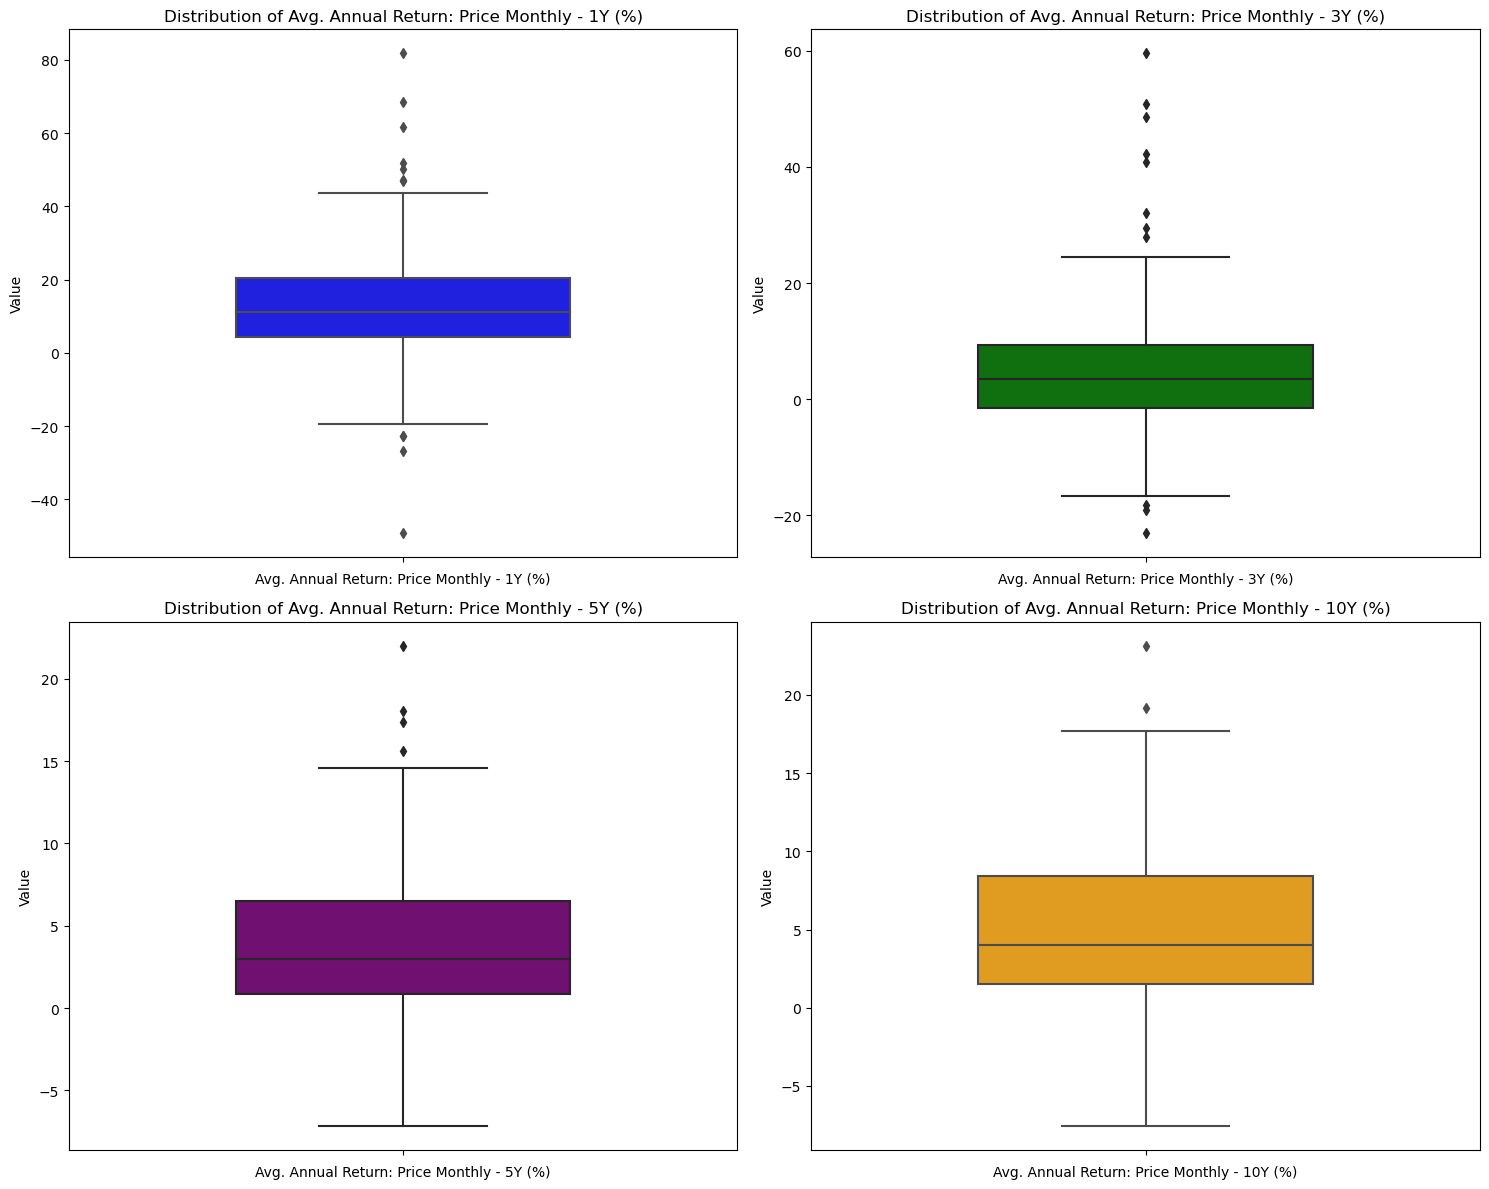

In [12]:
# Boxplots

# Columns selected
selected_returns = [
    "Avg. Annual Return: Price Monthly - 1Y (%)",
    "Avg. Annual Return: Price Monthly - 3Y (%)",
    "Avg. Annual Return: Price Monthly - 5Y (%)",
    "Avg. Annual Return: Price Monthly - 10Y (%)"
]

colors = ['blue', 'green', 'purple', 'orange']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

for ax, column, color in zip(axes.flatten(), selected_returns, colors):
    sns.boxplot(y=df_selected[column].dropna().astype(float), color=color, ax=ax, width=0.5)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Value')
    ax.grid(False)

plt.tight_layout()
plt.show()

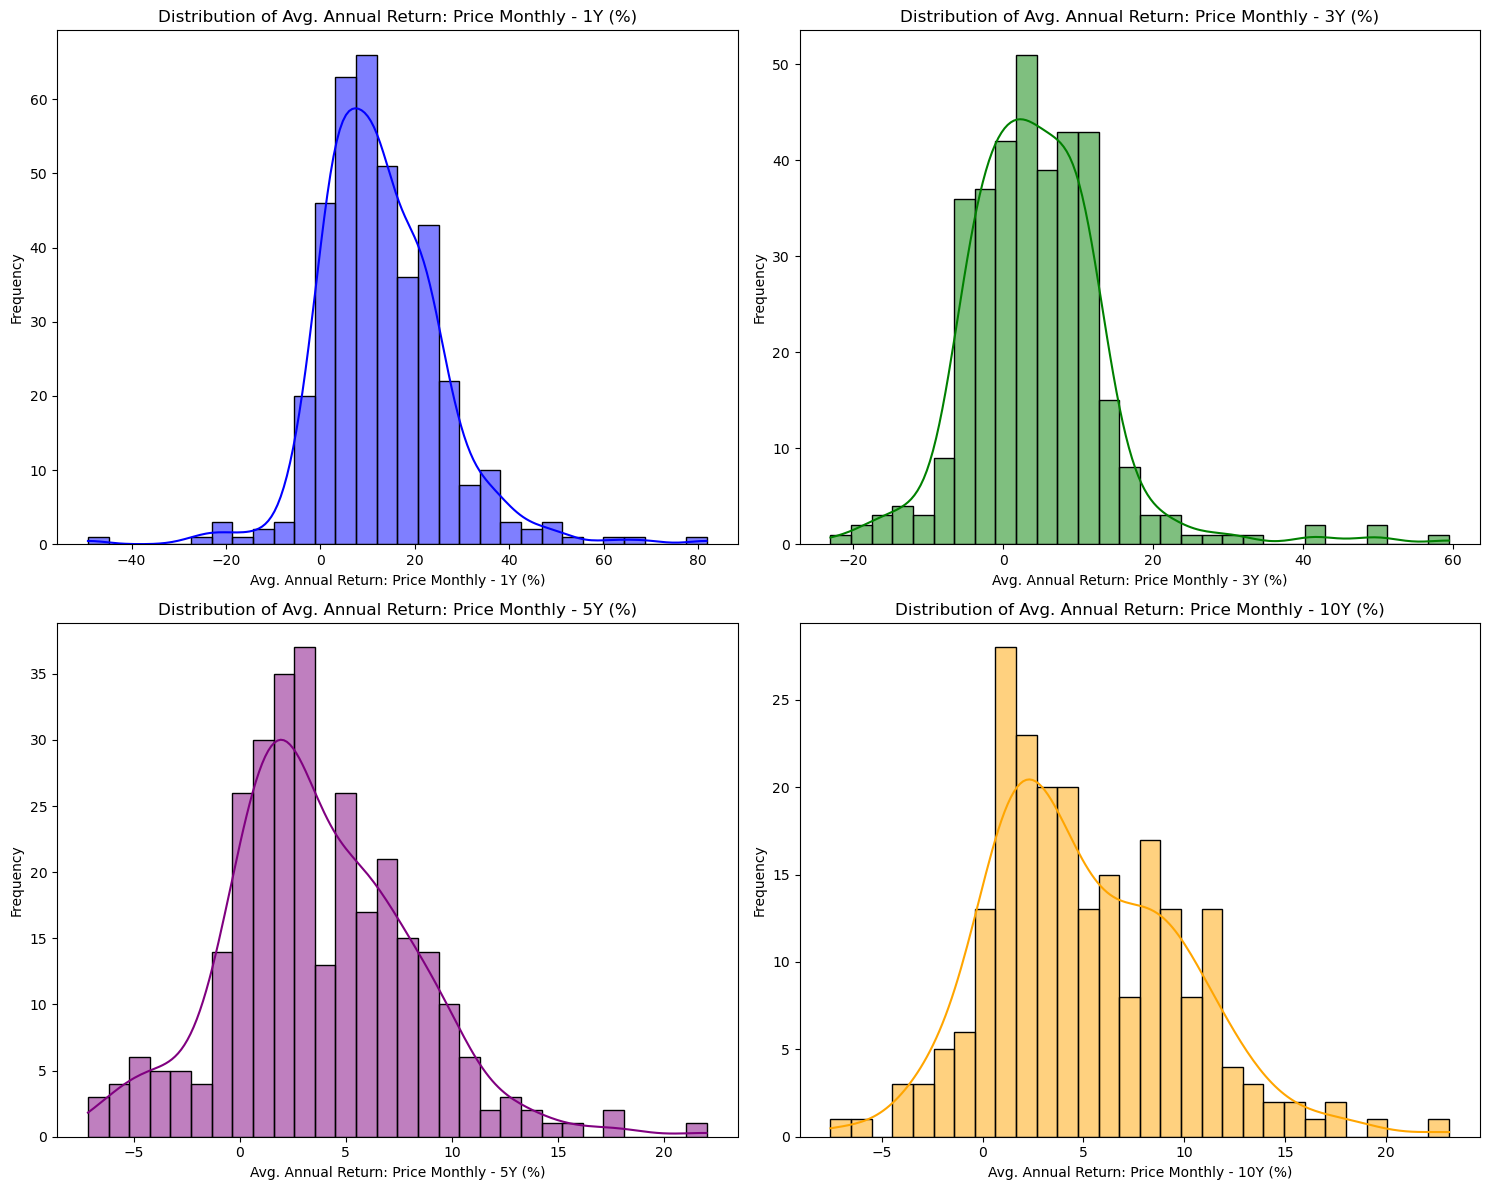

In [13]:
# Histogram

colors = ['blue', 'green', 'purple', 'orange']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

for ax, column, color in zip(axes.flatten(), selected_returns, colors):
    sns.histplot(df_selected[column].dropna().astype(float), bins=30, kde=True, 
                 color=color, edgecolor='black', ax=ax)    
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(False)

plt.tight_layout()
plt.show()

In [14]:
# Compound return for each ETF
df_selected['Compound Return'] = (
    (1 + df_selected["Avg. Annual Return: Price Monthly - 1Y (%)"]/100) *
    (1 + df_selected["Avg. Annual Return: Price Monthly - 3Y (%)"]/300)**3 *
    (1 + df_selected["Avg. Annual Return: Price Monthly - 5Y (%)"]/500)**5 *
    (1 + df_selected["Avg. Annual Return: Price Monthly - 10Y (%)"]/1000)**10 - 1
) * 100

# Top 5 ETFs with compound return
top_5_compound = df_selected.sort_values(by='Compound Return', ascending=False).head(5)
top_5_compound[['Ticker', 'Name', 'Compound Return']]

,Ticker,Name,Compound Return
62,SOXX,iShares Semiconductor ETF,176.028032
282,TUR,iShares MSCI Turkey ETF,172.780553
170,IEO,iShares U.S. Oil & Gas Exploration & Productio...,137.105083
243,IEZ,iShares U.S. Oil Equipment & Services ETF,134.981197
137,ITB,iShares U.S. Home Construction ETF,134.956182


In [15]:
# Top 5 ETFs based on 10-year returns
top_5_10_years = df_selected.sort_values(by="Avg. Annual Return: Price Monthly - 10Y (%)", ascending=False).head(5)
top_5_10_years[['Ticker', 'Name', 'Avg. Annual Return: Price Monthly - 10Y (%)']]

,Ticker,Name,Avg. Annual Return: Price Monthly - 10Y (%)
62,SOXX,iShares Semiconductor ETF,23.140869
44,IYW,iShares U.S. Technology ETF,19.191494
101,IXN,iShares Global Tech ETF,17.690000
105,IGM,iShares Expanded Tech Sector ETF,17.664976
80,IGV,iShares Expanded Tech-Software Sector ETF,16.448680
